In [2]:

!pip install easyocr

In [3]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [4]:
IMAGE_PATH = 'Image/ch.png'

In [5]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

/home/bekzat/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[434, 460], [2332, 460], [2332, 572], [434, 572]],
  'THE GREAT ENGLISH DOCUMENT',
  0.1241413801908493),
 ([[444, 583], [1858, 583], [1858, 710], [444, 710]],
  '1) Fisrst item with some english text',
  0.07283104956150055),
 ([[439, 690], [3455, 690], [3455, 816], [439, 816]],
  '2) Second item with some even more inglish text. Let me speek from my heart',
  0.004565699957311153),
 ([[461, 937], [780, 937], [780, 1036], [461, 1036]],
  'London',
  0.9962947368621826),
 ([[2377, 936], [3449, 936], [3449, 1053], [2377, 1053]],
  'The capital of Great Britain',
  0.06054726615548134),
 ([[460, 1092], [724, 1092], [724, 1204], [460, 1204]],
  'Speek',
  0.9764533042907715),
 ([[2370, 1089], [2973, 1089], [2973, 1210], [2370, 1210]],
  'From my heart',
  0.7071970105171204)]

In [6]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

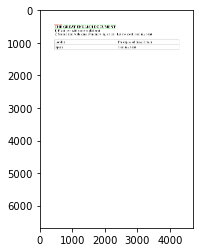

In [7]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,0,0),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

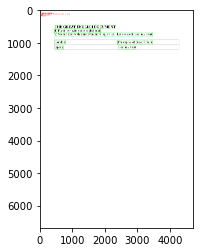

In [8]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.7,(255,0,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()

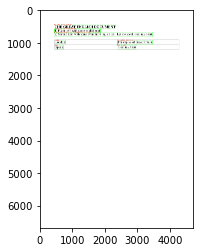

In [9]:
img = cv2.imread(IMAGE_PATH)
TEXT = ''
for detection in result: 
    top_left = tuple(int(val) for val in detection[0][0])
    bottom_right = tuple(int(val) for val in detection[0][2])
    text = detection[1]
    TEXT = TEXT + ' ' + text
    font = cv2.FONT_HERSHEY_COMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,top_left, font, 1,(255,0,0),2,cv2.LINE_AA)
    
plt.imshow(img)
plt.show()

In [14]:
print(TEXT)

 [Anaconda Navigator] english_ doc bad_text pdf [#studjchat- Discord] OCP Ba5ic5-Easy0CP Jup te.: FDF DalOBLII1 MeHe_rep H [read. py- (Pa6ouan ObnaCTb..: [TepIMHa belzatgbelzat... 6_?1 15 Map, 05:51 english_doc_bad_text pdf Dal TpaBka Bug Tlepexo_ 3aKnagKI CnpaBka Tpe Aslgyuan Cnegyouan (1 #3 1] Tlo LIpIHe CTpaHHLLI oopa3!ul CTpaHM! THE GREAT ENGLISH DOCUMENT 1) Fisrst item with some english text 2) Second item with some even more inglish text. Let me speek from myheart London The capital of Great Britain Speek From my heart


In [10]:
reader = easyocr.Reader(['en', 'ru'])
result = reader.readtext(IMAGE_PATH)
text = ''
for detection in result:
    text = text + ' ' + detection[1]
print(text)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


 THE GREAT ENGLISH DOCUMENT 1) Fisrst item with some english text 2) Second item with some even more inglish text. Let me speek from my heart London The capital of Great Britain Speek From my heart
